In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Import Dataset

In [2]:
!wget https://raw.githubusercontent.com/itsNV/House-Price-Prediction/refs/heads/main/test.csv


!wget https://raw.githubusercontent.com/itsNV/House-Price-Prediction/refs/heads/main/train.csv

--2026-01-01 00:25:35--  https://raw.githubusercontent.com/itsNV/House-Price-Prediction/refs/heads/main/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5424551 (5.2M) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>]   5.17M  --.-KB/s    in 0.04s   

2026-01-01 00:25:36 (138 MB/s) - ‘test.csv’ saved [5424551/5424551]

--2026-01-01 00:25:36--  https://raw.githubusercontent.com/itsNV/House-Price-Prediction/refs/heads/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2480912 (2.4

In [3]:

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


### Preprocessing

#### Missing Values

In [5]:
train.isnull().sum()

,0
POSTED_BY,0
UNDER_CONSTRUCTION,0
RERA,0
BHK_NO.,0
BHK_OR_RK,0
SQUARE_FT,0
READY_TO_MOVE,0
RESALE,0
ADDRESS,0
LONGITUDE,0


#### Duplicated values

In [6]:
train[train.duplicated() == 'True']

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)


#### Check for uniqueness

In [7]:
for i in train.columns:

  if(train[i].dtype == object):
    print(f'Uniqueness in {i} Column',train[i].unique())


Uniqueness in POSTED_BY Column ['Owner' 'Dealer' 'Builder']
Uniqueness in BHK_OR_RK Column ['BHK' 'RK']
Uniqueness in ADDRESS Column ['Ksfc Layout,Bangalore' 'Vishweshwara Nagar,Mysore' 'Jigani,Bangalore'
 ... 'west mambalam,Chennai' 'Gandhi Nagar,Gulbarga'
 'E3-108, Lake View Recidency,,Vapi']


#### Cnverting Categorical columns to numerical columns

In [8]:
from sklearn.preprocessing import LabelEncoder


def cat_to_num(dataframe):

  for i in dataframe.columns:

    if(dataframe[i].dtype == object):

      le = LabelEncoder()
      dataframe[i] = le.fit_transform(dataframe[i])

  return dataframe





In [9]:
train_updated = cat_to_num(train)
test_updated = cat_to_num(test)
train.head(),test.head()

(   POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO.  BHK_OR_RK    SQUARE_FT  \
 0          2                   0     0        2          0  1300.236407   
 1          1                   0     0        2          0  1275.000000   
 2          2                   0     0        2          0   933.159722   
 3          2                   0     1        2          0   929.921143   
 4          1                   1     0        2          0   999.009247   
 
    READY_TO_MOVE  RESALE  ADDRESS  LONGITUDE   LATITUDE  TARGET(PRICE_IN_LACS)  
 0              1       1     2844  12.969910  77.597960                   55.0  
 1              1       1     6576  12.274538  76.644605                   51.0  
 2              1       1     2256  12.778033  77.632191                   43.0  
 3              1       1     5095  28.642300  77.344500                   62.5  
 4              0       1     3830  22.592200  88.484911                   60.5  ,
    POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. 

#### Split the dataset

In [10]:
from sklearn.model_selection import train_test_split

X = train_updated.drop('TARGET(PRICE_IN_LACS)',axis=1)
y = train_updated['TARGET(PRICE_IN_LACS)']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

X_train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
4305,1,0,0,2,0,1232.352941,1,1,2321,13.010349,77.712151
15137,1,0,0,2,0,1070.020650,1,1,3487,12.969910,77.597960
16764,1,0,0,2,0,730.079266,1,1,88,22.541110,88.337780
28095,2,0,0,2,0,800.000000,1,1,899,12.907374,77.625811
291,2,0,0,3,0,1400.059577,1,1,2581,12.913771,77.768321


In [11]:
test_updated.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,2,0,0,1,0,545.171340,1,1,3903,21.262000,73.047700
1,1,1,1,2,0,800.000000,0,0,6484,18.966114,73.148278
2,1,0,0,2,0,1257.096513,1,1,6092,22.592200,88.484911
3,1,0,0,3,0,1400.329489,1,1,3843,26.988300,75.584600
4,2,0,0,1,0,430.477830,1,1,4995,22.700000,72.870000


#### 1) Ridge  ( For reducing `Overfitting` )

Import the libraries

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV




#### Alpha value and Cross validation

In [27]:
parameters = {'alpha' : [1,2,3,4,5,10,20,30,40]}

ridge_regressor = Ridge()

ridgecv = GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_absolute_error',cv=6)

ridgecv.fit(X_train,y_train)





/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.39906e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.84252e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.39903e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.39902e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.40013e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/pytho

GridSearchCV(cv=6, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 10, 20, 30, 40]},
             scoring='neg_mean_absolute_error')

In [28]:
ridgecv.best_params_,ridgecv.best_score_

({'alpha': 40}, np.float64(-133.111642436744))

#### Fit the model with the best params we got


> Here you can either predict with the `ridge_regressor` model or also with the `ridgecv`. Both gives same result.

In [37]:
ridge_regressor = Ridge(alpha=40)
ridge_regressor.fit(X_train,y_train)

Ridge(alpha=40)

#### Predictions

In [38]:
y_pred = ridge_regressor.predict(X_test)


In [39]:

y_pred

array([205.82808633, 196.55394208,  82.61457376, ..., 206.05477799,
       166.64880093,  16.05905527])



#### Find MAE

In [40]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test,y_pred)
mae

144.35260061315188

#### Plot the graph

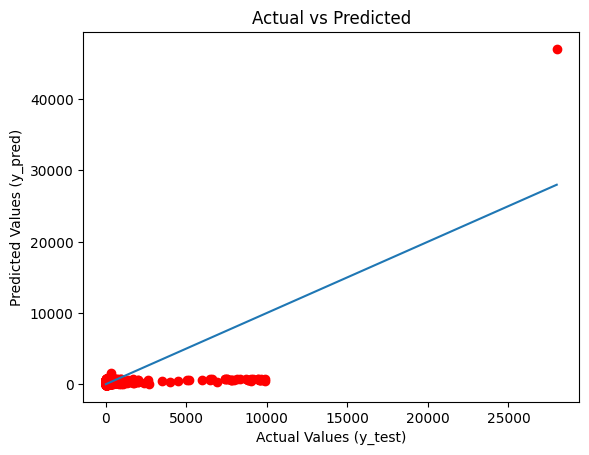

In [41]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred,c='r')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted")
plt.show()



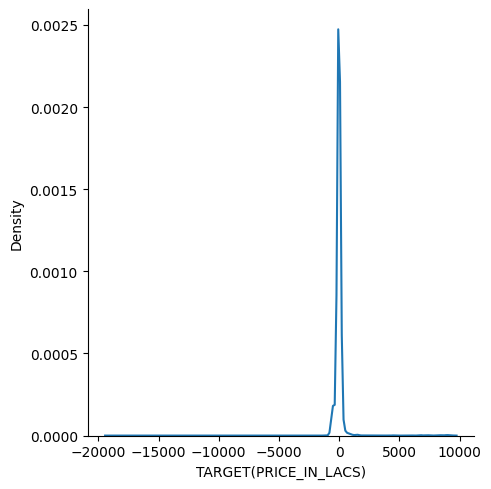

In [42]:
import seaborn as sns

sns.displot(y_test-y_pred,kind='kde')

#### 2) Lasso ( For Reducing `Overfitting` and `Feature Selection` )

Import the libraries

In [43]:
from sklearn.linear_model import Lasso

#### Alpha value and Cross-validation

> Alpha value `parameter` is same as in the ridge

In [50]:
lasso_regressor = Lasso()

lassocv = GridSearchCV(lasso_regressor,parameters,scoring='neg_mean_squared_error',cv=6)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 10, 20, 30, 40]},
             scoring='neg_mean_squared_error')

In [51]:
lassocv.best_params_,lassocv.best_score_

({'alpha': 1}, np.float64(-357062.79640795296))

#### Predictions

In [52]:
y_pred = lassocv.predict(X_test)
y_pred

array([197.36133523, 193.90120564,  81.88840212, ..., 197.58328499,
       167.87131477,  15.63731323])

Find MAE

In [53]:
mae = mean_absolute_error(y_test,y_pred)
mae

143.87309623470617

#### Plot the Graph

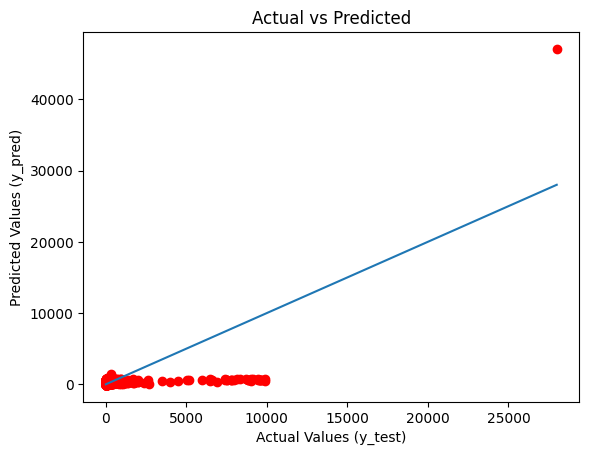

In [54]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred,c='r')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted")
plt.show()

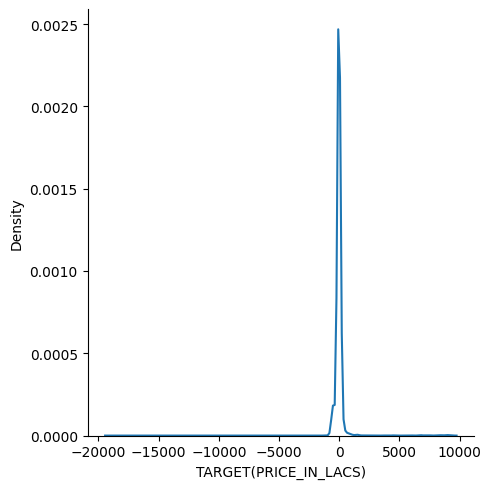

In [55]:
import seaborn as sns
sns.displot(y_test-y_pred,kind='kde')